In [1]:
######################################
#  Análisis de Sentimiento usando R
# ####################################

#library(rtweet)
#library(httr)
#library(tidyverse)

# Install : 
# conda install -c r r
# conda install -c r r-tm
# conda install -c r-essentials
# conda install -c conda-forge r-rtweet
# conda install -c r r-snowballc
# conda install -c r r-tm
# conda install -c conda-forge r-syuzhet

# Carga de librerias
library(SnowballC)
library(tm)
library(syuzhet)
library(dplyr)
library(data.table)

# libreria de gráficos
library(ggplot2)

Loading required package: NLP

Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Attaching package: 'data.table'

The following objects are masked from 'package:dplyr':

    between, first, last


Attaching package: 'ggplot2'

The following object is masked from 'package:NLP':

    annotate



In [2]:
##################################
##     Obtención de datos
##################################

# Rutas de los archivos

FILE_ENCONDING <- "ISO-8859-1"
FILE_URL_1 <- "D:\\personal\\Maestria\\Tesis\\Datos\\Lima\\resultados-lima-navidad.csv"
FILE_URL_2 <- "D:\\personal\\Maestria\\Tesis\\Datos\\Lima\\resultados-lima-navidad-13122018.csv"
FILE_URL_3 <- "D:\\personal\\Maestria\\Tesis\\Datos\\Lima\\resultados-lima-navidad-20122018.csv"

# Lectura de tweets
Navidad.1.tweets <- read.csv(FILE_URL_1, fileEncoding = FILE_ENCONDING )
Navidad.2.tweets <- read.csv(FILE_URL_2, fileEncoding = FILE_ENCONDING )
Navidad.3.tweets <- read.csv(FILE_URL_3, fileEncoding = FILE_ENCONDING )


Warning message in scan(file = file, what = what, sep = sep, quote = quote, dec = dec, :
"EOF within quoted string"

In [21]:
# Unificando dataframe
#Navidad.tweets <- rbind(Navidad.1.tweets , Navidad.2.tweets , Navidad.3.tweets)
Navidad.tweets <- rbind(Navidad.3.tweets)
# Columnas de los tweet
colnames(Navidad.tweets)

[1] "user_id"                 "status_id"              
 [3] "created_at"              "screen_name"            
 [5] "text"                    "source"                 
 [7] "display_text_width"      "reply_to_status_id"     
 [9] "reply_to_user_id"        "reply_to_screen_name"   
[11] "is_quote"                "is_retweet"             
[13] "favorite_count"          "retweet_count"          
[15] "hashtags"                "symbols"                
[17] "urls_url"                "urls_t.co"              
[19] "urls_expanded_url"       "media_url"              
[21] "media_t.co"              "media_expanded_url"     
[23] "media_type"              "ext_media_url"          
[25] "ext_media_t.co"          "ext_media_expanded_url" 
[27] "ext_media_type"          "mentions_user_id"       
[29] "mentions_screen_name"    "lang"                   
[31] "quoted_status_id"        "quoted_text"            
[33] "quoted_created_at"       "quoted_source"          
[35] "quoted_favorite_count"   "quoted_retweet_count"   
[37] "quoted_user_id"          "quoted_screen_name"     
[39] "quoted_name"             "quoted_followers_count" 
[41] "quoted_friends_count"    "quoted_statuses_count"  
[43] "quoted_location"         "quoted_description"     
[45] "quoted_verified"         "retweet_status_id"      
[47] "retweet_text"            "retweet_created_at"     
[49] "retweet_source"          "retweet_favorite_count" 
[51] "retweet_retweet_count"   "retweet_user_id"        
[53] "retweet_screen_name"     "retweet_name"           
[55] "retweet_followers_count" "retweet_friends_count"  
[57] "retweet_statuses_count"  "retweet_location"       
[59] "retweet_description"     "retweet_verified"       
[61] "place_url"               "place_name"             
[63] "place_full_name"         "place_type"             
[65] "country"                 "country_code"           
[67] "geo_coords"              "coords_coords"          
[69] "bbox_coords"             "status_url"             
[71] "name"                    "location"               
[73] "description"             "url"                    
[75] "protected"               "followers_count"        
[77] "friends_count"           "listed_count"           
[79] "statuses_count"          "favourites_count"       
[81] "account_created_at"      "verified"               
[83] "profile_url"             "profile_expanded_url"   
[85] "account_lang"            "profile_banner_url"     
[87] "profile_background_url"  "profile_image_url"      
[89] "LIMA"

In [22]:
# Primeros tweet
head(Navidad.tweets)

user_id,status_id,created_at,screen_name,text,source,display_text_width,reply_to_status_id,reply_to_user_id,reply_to_screen_name,⋯,favourites_count,account_created_at,verified,profile_url,profile_expanded_url,account_lang,profile_banner_url,profile_background_url,profile_image_url,LIMA
x797830528930082816,x1075881267177111552,2018-12-20 22:30:57,QuintansPaula,"Aaaaa <f0><U+009F><U+0098><U+008D>por fin me llego el libro de edd00chan estoy muy feliz con la compra no puedo esperar para leerlo.Pero tengo que esperar hasta Navidad , me lo he ojeado y me encanta todo <f0><U+009F><U+0098><U+008D><f0><U+009F><U+00A5><U+00B0> @edd00chan @MrDsaster #FHS #FNAFHS https://t.co/PjMPKWnFrb",Twitter for Android,140,,,,,30308,2016-11-13 15:56:35,FALSE,,,es,https://pbs.twimg.com/profile_banners/797830528930082816/1534007019,,http://pbs.twimg.com/profile_images/1049045290131578881/CTRfXE-t_normal.jpg,MODERNA
x98681636,x1075881117348179973,2018-12-20 22:30:21,KallpaSAB,¡Feliz Navidad les desea Kallpa SAB! En 2019 sube la @BVLPeru. ¿Si o no amigos? https://t.co/fidEE25bv6,Twitter for iPhone,80,,,,,12,2009-12-22 17:34:09,FALSE,https://t.co/p8FJDNALD9,http://www.kallpasab.com,es,https://pbs.twimg.com/profile_banners/98681636/1402074859,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/475017238047514624/JJOMCqwZ_normal.jpeg,MODERNA
x385049852,x1075881105310523393,2018-12-20 22:30:19,EsteticaToqueX,¡Diseño increíbles para lucir en Navidad! En #ToqueX tenemos variedad de modelos navideños y el talento de nuestras nail artist para que tus uñas deslumbren en estas fiestas. #nailart #nails https://t.co/StKtocBbbn,Hootsuite Inc.,190,,,,,701,2011-10-04 19:46:40,FALSE,https://t.co/AmPRknPZDp,http://toquex.pe,es,https://pbs.twimg.com/profile_banners/385049852/1544196094,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/1071062218949697536/nt7Nm3fn_normal.jpg,MODERNA
x385049852,x1074439156753985536,2018-12-16 23:00:31,EsteticaToqueX,"#ToqueTip Luego de un largo día de compras navideñas y reuniones, tus pies necesitan relajarse. Bañalos en agua tibia con un poco de sal por 15 o 20 minutos, te ayudará a reducir la hinchazón. #cuidatuspies https://t.co/o3OPSCZbx3",Hootsuite Inc.,206,,,,,701,2011-10-04 19:46:40,FALSE,https://t.co/AmPRknPZDp,http://toquex.pe,es,https://pbs.twimg.com/profile_banners/385049852/1544196094,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/1071062218949697536/nt7Nm3fn_normal.jpg,MODERNA
x385049852,x1075080908447846405,2018-12-18 17:30:37,EsteticaToqueX,¡Sorprende a tu amigo secreto engriéndolo! Con los Certificados de regalo de Toque X puedes obsequiarle desde un paquete de manicure y pedicure hasta un cambio de look. ¡Tu elijes que regalar! #toquex #regalaengreimiento #amigosecreto #navidad https://t.co/oBl2OKUzDQ,Hootsuite Inc.,243,,,,,701,2011-10-04 19:46:40,FALSE,https://t.co/AmPRknPZDp,http://toquex.pe,es,https://pbs.twimg.com/profile_banners/385049852/1544196094,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/1071062218949697536/nt7Nm3fn_normal.jpg,MODERNA
x385049852,x1074650593069858817,2018-12-17 13:00:42,EsteticaToqueX,Cada día se siente más cerca la víspera de Navidad<f0><U+009F><U+008E><U+0084>. Te esperamos en nuestras sedes a partir del día de hoy en horario extendido. #toquex #navidad https://t.co/Ch9te2nVbp,Hootsuite Inc.,146,,,,,701,2011-10-04 19:46:40,FALSE,https://t.co/AmPRknPZDp,http://toquex.pe,es,https://pbs.twimg.com/profile_banners/385049852/1544196094,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/1071062218949697536/nt7Nm3fn_normal.jpg,MODERNA


In [23]:
# Convertir a minusculas
Navidad.tweets$text <- tolower(Navidad.tweets$text)

In [24]:
# Filtrar tweets que relacione tiendas comerciales de Lima con las palabras raices de compr y regal
Navidad.tweets <- filter(Navidad.tweets,
                             (   text %like% "gamarra" 
                               | text %like% "sagafalabella" | text %like% "saga"
                               | text %like% "oechsle"
                               | text %like% "ripley"
                             ) 
                             &
                             (   text %like% "compr"   # COMPRAR
                               | text %like% "regal"   # REGALAR
                             ) 
                            ) # fin de filter
# Mostrar tweets filtrados
head(Navidad.tweets)

user_id,status_id,created_at,screen_name,text,source,display_text_width,reply_to_status_id,reply_to_user_id,reply_to_screen_name,⋯,favourites_count,account_created_at,verified,profile_url,profile_expanded_url,account_lang,profile_banner_url,profile_background_url,profile_image_url,LIMA
x62904521,x1073290538932166656,2018-12-13 18:56:19,SAYSAYSAYSA,"@patriciagamarra creo q se hará el sueño de muchos el mejor regalo que nos puede dar dios esta navidad, es el nacimiento de una nueva era. y pa dentro ag, yeeeeeee",Twitter for Android,163,,x87264094,patriciagamarra,,198866,2009-08-04 19:28:56,FALSE,,,es,https://pbs.twimg.com/profile_banners/62904521/1522643928,http://abs.twimg.com/images/themes/theme10/bg.gif,http://pbs.twimg.com/profile_images/980665564623339520/atqhLeSI_normal.jpg,MODERNA
x834602042719080448,x1075610521754329088,2018-12-20 04:35:06,DanteChambi,"dos compras hechas en plataformas de e-commerce peruanas, dos órdenes con problemas (tai loy y ripley). en una me avisan una semana después que no hay stock. en la otra el sistema colocó la dirección de entrega que le dió la gana (y no la pueden modificar). una mierda todo.",Twitter for Android,140,,,,,275,2017-02-23 03:13:27,FALSE,https://t.co/kmkNXKO2c9,http://www.atomixgames.net,es,https://pbs.twimg.com/profile_banners/834602042719080448/1522605480,,http://pbs.twimg.com/profile_images/980504617606897665/exIqynuL_normal.jpg,MODERNA
x1598940024,x1075474826607902721,2018-12-19 19:35:54,renzokufc,"dos compras hechas en plataformas de e-commerce peruanas, dos órdenes con problemas (tai loy y ripley). en una me avisan una semana después que no hay stock. en la otra el sistema colocó la dirección de entrega que le dió la gana (y no la pueden modificar). una mierda todo.",Twitter for Android,276,,,,,621,2013-07-16 18:09:38,FALSE,,,es,,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/1035640577361174529/LZuysCNW_normal.jpg,MODERNA
x277831332,x1074867299318943744,2018-12-18 03:21:48,astrikiss,"los perfumes con dscto. de saga o ripley, porq luego sabes el precio <f0><u+009f><u+00a4><u+00b7><f0><u+009f><u+008f><u+00bb><u+200d><u+2640><u+fe0f> #regalosquepaltean",Twitter for Android,93,,,,,3171,2011-04-06 03:41:20,FALSE,,,es,https://pbs.twimg.com/profile_banners/277831332/1486918292,http://abs.twimg.com/images/themes/theme10/bg.gif,http://pbs.twimg.com/profile_images/908191124984143872/ISgKGkLr_normal.jpg,MODERNA
x620567800,x1074645808375586817,2018-12-17 12:41:41,anita_shima,"#novenganporaquí por los típicos lugares de compras de fin de año: gamarra y mercado central, con tanta gente y tan poco espacio que dejan para transitar, además del peligro de sus instalaciones inseguras #novayan @mananamaldita @planeta107fm",Twitter for Android,242,,,,,7740,2012-06-28 02:40:39,FALSE,,,es,https://pbs.twimg.com/profile_banners/620567800/1522646842,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/1052714088986480640/AbURDJvr_normal.jpg,MODERNA
x118573621,x1074457323601625091,2018-12-17 00:12:43,arroba1988,@sagafalabella que onda con no entregarme el producto que les compré hace mas de una semana? les compre una campana @mabe y hasta ahora no me dan una fecha real de entrega. @osiptel que hago en este caso?,Twitter Web Client,204,,x902005135995494400,SagaFalabella,,138,2010-03-01 03:19:44,FALSE,,,es,https://pbs.twimg.com/profile_banners/118573621/1539823946,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/746070692999925760/YHg7m96J_normal.jpg,MODERNA


In [25]:
##################################
##     Limpieza de datos
##################################

# Eliminado los links en los Navidad.tweets
Navidad.tweets$text2 <- gsub("http.*","",Navidad.tweets$text)
Navidad.tweets$text2 <- gsub("https.*","",Navidad.tweets$text2)

# Eliminando  los hashtags y usuarios en los Navidad.tweets
Navidad.tweets$text2 <- gsub("#\\w+","",Navidad.tweets$text2)
Navidad.tweets$text2 <- gsub("@\\w+","",Navidad.tweets$text2)

# Eliminado los signos de puntuación, números y textos con números
Navidad.tweets$text2 <- gsub("[[:punct:]]","",Navidad.tweets$text2)
Navidad.tweets$text2 <- gsub("\\w*[0-9]+\\w*\\s*", "",Navidad.tweets$text2)

# Mostrar tweets limpieados
head(Navidad.tweets$text2)

[1] " creo q se hará el sueño de muchos el mejor regalo que nos puede dar dios esta navidad es el nacimiento de una nueva era y pa dentro ag yeeeeeee"                                                                                                                               
[2] "dos compras hechas en plataformas de ecommerce peruanas dos órdenes con problemas tai loy y ripley\n\nen una me avisan una semana después que no hay stock\nen la otra el sistema colocó la dirección de entrega que le dió la gana y no la pueden modificar\n\nuna mierda todo"
[3] "dos compras hechas en plataformas de ecommerce peruanas dos órdenes con problemas tai loy y ripley\n\nen una me avisan una semana después que no hay stock\nen la otra el sistema colocó la dirección de entrega que le dió la gana y no la pueden modificar\n\nuna mierda todo"
[4] "los perfumes con dscto de saga o ripley porq luego sabes el precio "                                                                                                                                                                                                            
[5] " por los típicos lugares de compras de fin de año gamarra y mercado central con tanta gente y tan poco espacio que dejan para transitar además del peligro de sus instalaciones inseguras   "                                                                                   
[6] " que onda con no entregarme el producto que les compré hace mas de una semana les compre una campana  y hasta ahora no me dan una fecha real de entrega  que hago en este caso"

In [26]:
##################################
##     Análisis de Sentimiento
##################################

palabra <- as.vector(Navidad.tweets$text2)

emocion <- get_nrc_sentiment(char_v = palabra, language = "spanish")

emocion2 <- cbind("text" = Navidad.tweets$text2, emocion)

head(emocion2)

text,anger,anticipation,disgust,fear,joy,sadness,surprise,trust,negative,positive
creo q se hará el sueño de muchos el mejor regalo que nos puede dar dios esta navidad es el nacimiento de una nueva era y pa dentro ag yeeeeeee,0,3,0,2,3,0,1,2,0,3
dos compras hechas en plataformas de ecommerce peruanas dos órdenes con problemas tai loy y ripley en una me avisan una semana después que no hay stock en la otra el sistema colocó la dirección de entrega que le dió la gana y no la pueden modificar una mierda todo,1,2,2,0,1,0,2,2,2,2
dos compras hechas en plataformas de ecommerce peruanas dos órdenes con problemas tai loy y ripley en una me avisan una semana después que no hay stock en la otra el sistema colocó la dirección de entrega que le dió la gana y no la pueden modificar una mierda todo,1,2,2,0,1,0,2,2,2,2
los perfumes con dscto de saga o ripley porq luego sabes el precio,0,0,0,0,0,0,0,0,0,0
por los típicos lugares de compras de fin de año gamarra y mercado central con tanta gente y tan poco espacio que dejan para transitar además del peligro de sus instalaciones inseguras,0,2,0,2,1,0,1,1,2,1
que onda con no entregarme el producto que les compré hace mas de una semana les compre una campana y hasta ahora no me dan una fecha real de entrega que hago en este caso,0,1,0,1,0,1,0,1,1,3


In [27]:
##################################
##     Cuantificación de un 
##    dataframe de emociones
##################################

# Empezamos transponiendo emocion.df
emocion.resumen <- data.frame(t(emocion))

# Suma de puntajes por emocion
emocion.resumen <- data.frame(rowSums(emocion.resumen))

# Columa de conteo de totales
names(emocion.resumen)[1] <- "total"

# Agregamos columna de emociones
emocion.resumen <- cbind("sentimiento" = rownames(emocion.resumen), emocion.resumen)

# Eliminamos el nombre de las filas
rownames(emocion.resumen) <- NULL

# Mostrar resumen de emociones
print(emocion.resumen)

    sentimiento total
1         anger    13
2  anticipation    59
3       disgust    13
4          fear    27
5           joy    40
6       sadness    19
7      surprise    36
8         trust    63
9      negative    42
10     positive    86


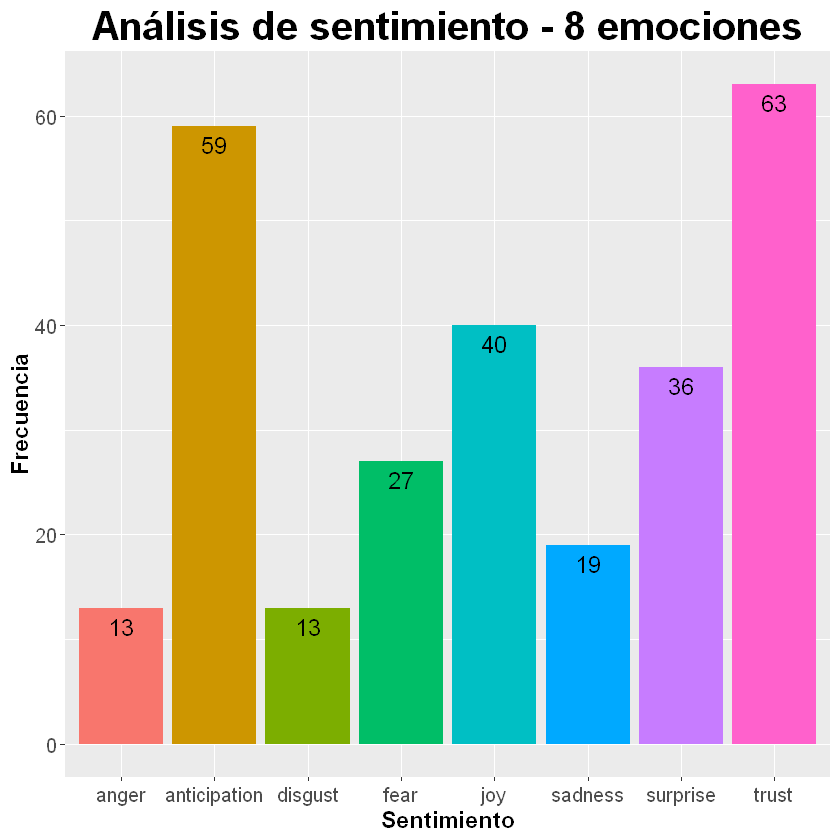

In [28]:
# Gráfico de emociones

emociones.grafico <- ggplot(emocion.resumen[1:8,], 
                               aes(x = sentimiento, y = total, fill = sentimiento)) + 
                        geom_bar(stat = "identity") + 
                        labs(title = "Análisis de sentimiento - 8 emociones", x = "Sentimiento", y = "Frecuencia") +
                        geom_text(aes(label = total), vjust = 1.5, color = "black", size = 5) +
                        theme(plot.title = element_text(hjust = 0.5),
                              axis.text = element_text(size=12),
                              axis.title = element_text(size=14,face = "bold"),
                              title = element_text(size=20,face = "bold"),
                              legend.position = "none")

print(emociones.grafico)

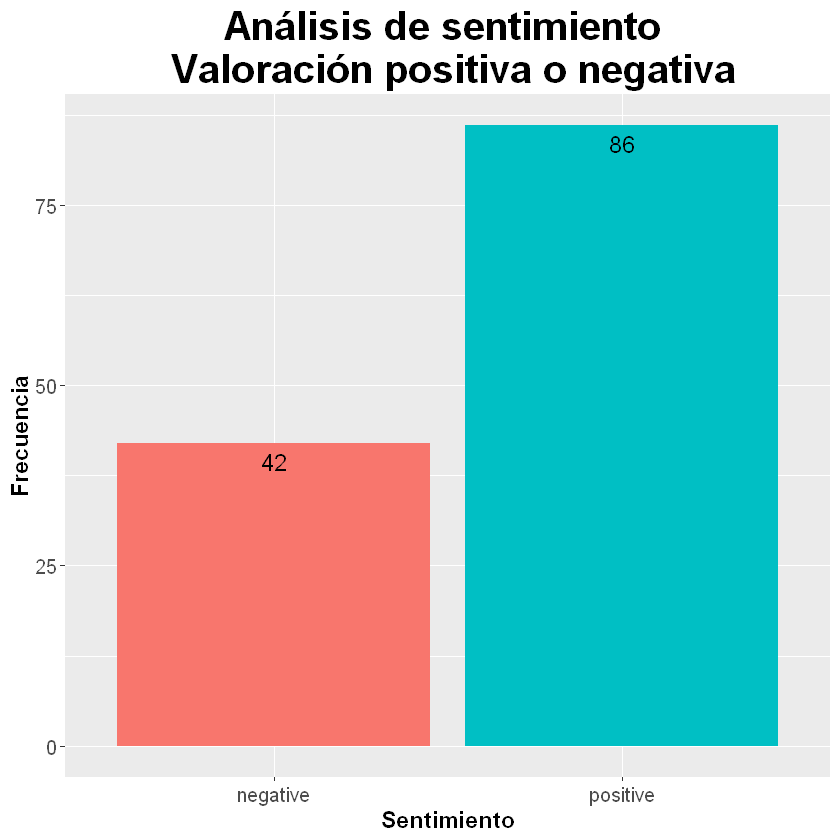

In [29]:
# Gráfico de valoraciones positivas y negativas

valoracion.grafico <- ggplot(emocion.resumen[9:10,], 
                               aes(x = sentimiento, y = total, fill = sentimiento)) + 
                        geom_bar(stat = "identity") + 
                        labs(title = "Análisis de sentimiento \n Valoración positiva o negativa", x = "Sentimiento", y = "Frecuencia") +
                        geom_text(aes(label = total), vjust = 1.5, color = "black", size = 5) +
                        theme(plot.title = element_text(hjust = 0.5),
                              axis.text = element_text(size=12),
                              axis.title = element_text(size=14,face = "bold"),
                              title = element_text(size=20,face = "bold"),
                              legend.position = "none")

print(valoracion.grafico)